# PARTE 2: Algoritmo Árvores de Decisão

Nesta segunda parte do Trabalho você irá aplicar os algoritmos de Árvore de Decisão e de Floresta Aleatória na base de dados de risco de crédito discutida em aula. Para isso você deve primeiramente importar as bibliotecas necessárias.

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

# 1 - Importação dos dados Pré-Processados

a) importe o arquivo salvo como 'risco_credito.pkl'



In [48]:
import pickle
with open('risco_credito.pkl', 'rb') as f:
  X_risco_credito, y_risco_credito = pickle.load(f)

# 2 - Algoritmo de Árvore de Decisão



a) importar da biblioteca sklearn o pacote DecisionTreeClassifier

b) Calcule a árvore de decisão, utilizando como critério a entropia.
Coloque como nome da variável: arvore_risco_credito

In [49]:
# b) Calcule a árvore de decisão, utilizando como critério a entropia.
arvore_risco_credito = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_risco_credito.fit(X_risco_credito, y_risco_credito)

,criterion,'entropy'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


c) Utilize o feature_importances_ para retornar a importância de cada atributo. Qual possui o maior ganho de informação?

In [50]:
# c) Utilize o feature_importances_ para retornar a importância de cada atributo. Qual possui o maior ganho de informação?
importancias = arvore_risco_credito.feature_importances_
nomes_atributos = ['historia', 'divida', 'garantias', 'renda']
print('Importância de cada atributo:', importancias)
maior_ganho = np.argmax(importancias)
print('Atributo com maior ganho de informação (índice):', maior_ganho)
print('Atributo com maior ganho de informação (nome):', nomes_atributos[maior_ganho])

Importância de cada atributo: [0.3362078  0.14179499 0.03885431 0.4831429 ]
Atributo com maior ganho de informação (índice): 3
Atributo com maior ganho de informação (nome): renda


d) Gere uma visualização da sua árvore de decisão utilizando o pacote tree da biblioteca do sklearn.

OBS: Adicione cores, nomes para os atributos e para as classes.

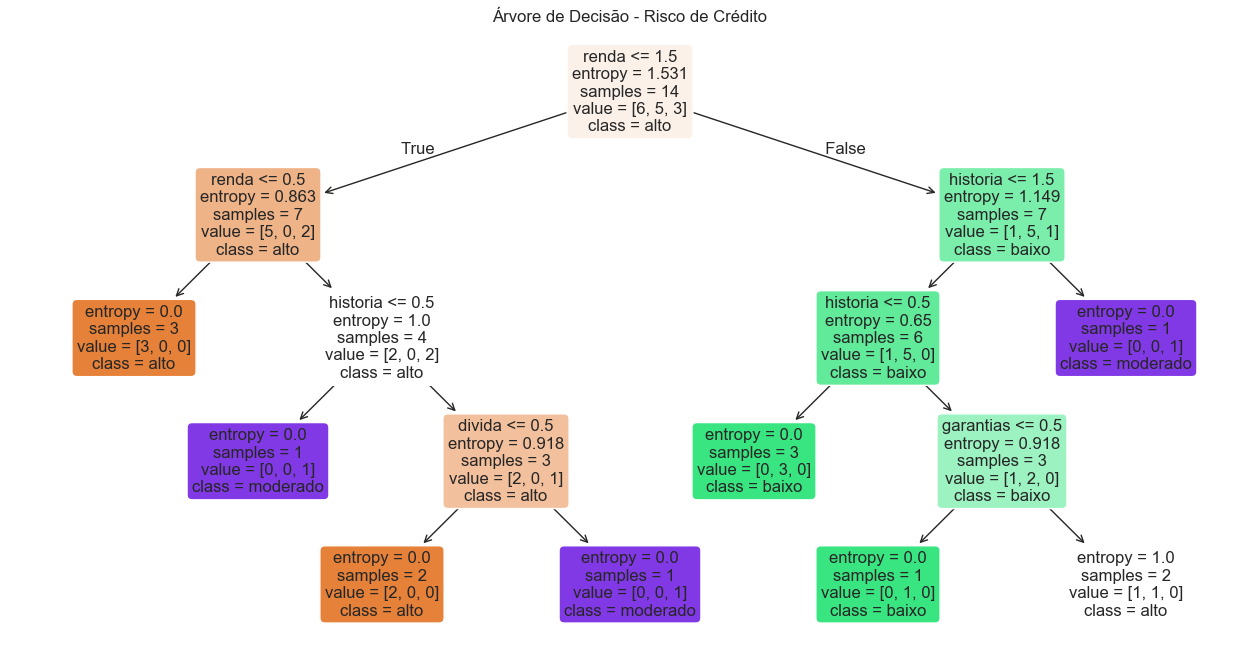

In [51]:
from sklearn import tree
plt.figure(figsize=(16,8))
nomes_atributos = ['historia', 'divida', 'garantias', 'renda']
nomes_classes = ['alto', 'baixo', 'moderado']
tree.plot_tree(
    arvore_risco_credito,
    feature_names=nomes_atributos,
    class_names=nomes_classes,
    filled=True,
    rounded=True,
    fontsize=12
)
plt.title('Árvore de Decisão - Risco de Crédito')
plt.show()

e) FAZER A PREVISÃO

Utilize .predict para fazer a previsão realizada no exemplo em sala.

   i. história boa, dívida alta, garantia nenhuma, renda > 35

   ii. história ruim, dívida alta, garantia adequada, renda < 15


Verifique nos slides se seu resultado está correto!

Já feito na parte 1 do trabalho.


#3 - Algoritmo de Árvore de Decisão para uma base de dados maior (Credit Data)

Nesta seção você deverá testar o uso da Árvore de Decisão para a Base de Dados Credit Risk Dataset. Aqui estaremos analisando os clientes que pagam (classe 0) ou não pagam a dívida (classe 1), a fim do banco conceder empréstimo.

In [52]:
# abrir o arquivo
with open('risco_credito.pkl', 'rb') as f:
    dados = pickle.load(f)

a) Ao abrir o arquivo utilize .shape para verificar o tamanho dos dados de treinamento e de teste

OBS: os dados de treinamento devem ter as seguintes dimenções: x=(1500, 3), y=(1500,); os dados de teste devem ter as seguintes dimenções: x=(500, 3), y=(500,)

In [53]:
# Verifique o tamanho dos dados de treinamento e teste
with open('credit1.pkl', 'rb') as f:
    X_credit_treinamento, y_credit_treinamento, X_credit_teste, y_credit_teste = pickle.load(f)

print('X_credit_treinamento.shape:', X_credit_treinamento.shape)
print('y_credit_treinamento.shape:', y_credit_treinamento.shape)
print('X_credit_teste.shape:', X_credit_teste.shape)
print('y_credit_teste.shape:', y_credit_teste.shape)

X_credit_treinamento.shape: (1500, 3)
y_credit_treinamento.shape: (1500,)
X_credit_teste.shape: (500, 3)
y_credit_teste.shape: (500,)


b) Importe o pacote DecisionTreeClassifier do sklearn para treinar o seu algoritmo de árvore de decisão. Para poder refazer os testes e obter o mesmo resultado utilize o parâmetro random_state = 0.

# Treinando o algoritmo de árvore de decisão com os dados de treinamento
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)
print('Árvore de decisão treinada com sucesso!')

c) Faça a previsão com os dados de teste. Visualize os dados e verifique se as previsões estão de acordo com os dados de teste (respostas reais).

Previsões: [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0
 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 1 0 1
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 1 0

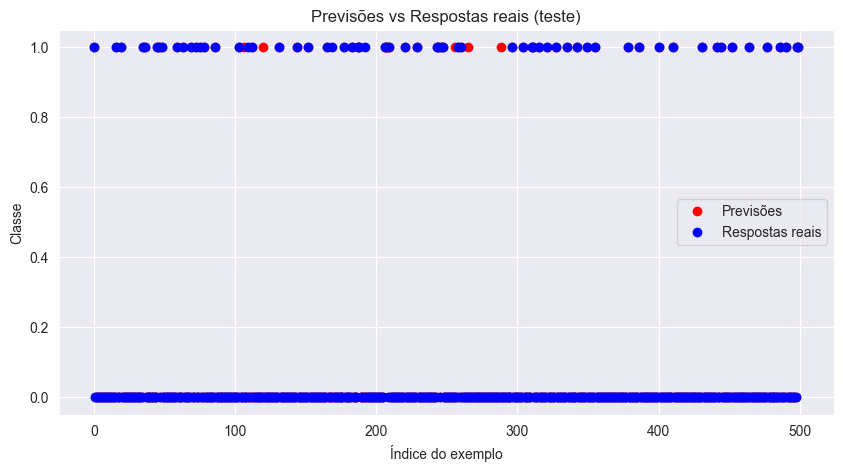

In [54]:
# c) Faça a previsão com os dados de teste. Visualize os dados e verifique se as previsões estão de acordo com os dados de teste (respostas reais).
arvore_credit = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_credit.fit(X_credit_treinamento, y_credit_treinamento)
previsoes = arvore_credit.predict(X_credit_teste)
print('Previsões:', previsoes)
print('Respostas reais:', y_credit_teste)

# Visualização das previsões vs reais
plt.figure(figsize=(10,5))
plt.plot(previsoes, 'ro', label='Previsões')
plt.plot(y_credit_teste, 'bo', label='Respostas reais')
plt.title('Previsões vs Respostas reais (teste)')
plt.xlabel('Índice do exemplo')
plt.ylabel('Classe')
plt.legend()
plt.show()

d) Agora faça o cálculo da acurácia para calcular a taxa de acerto entre os valores reais (y teste) e as previsões

In [55]:
from sklearn.metrics import accuracy_score, classification_report

previsoes = arvore_credit.predict(X_credit_teste)

acuracia = accuracy_score(y_credit_teste, previsoes)
print(f'Acurácia: {acuracia:.4f}')

print('\nClassification Report:')
print(classification_report(y_credit_teste, previsoes))

Acurácia: 0.9820

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



e) Faça a análise da Matriz de Confusão.

i. Quantos clientes foram classificados corretamente que pagam a dívida?

ii. Quantos clientes foram classificados incorretamente como não pagantes?

iii. Quantos clientes foram classificados corretamente que não pagam?

iv. Quantos clientes foram classificados incorretamente como pagantes?

In [56]:
from sklearn.metrics import confusion_matrix

y_pred = arvore_credit.predict(X_credit_teste)

# Matriz de confusão: linhas = valores reais (0=paga, 1=não paga), colunas = previstas
cm = confusion_matrix(y_credit_teste, y_pred, labels=[0, 1])
print('Matriz de Confusão (reais x previstas):')
print(cm)

if cm.shape == (2, 2):
    tn, fp, fn, tp = cm.ravel()
    print('\nRespostas:')
    print(f'i.  Classificados corretamente que pagam (classe 0) [TN]: {tn}')
    print(f'ii. Classificados incorretamente como não pagantes (real 0, predito 1) [FP]: {fp}')
    print(f'iii. Classificados corretamente que não pagam (classe 1) [TP]: {tp}')

Matriz de Confusão (reais x previstas):
[[430   6]
 [  3  61]]

Respostas:
i.  Classificados corretamente que pagam (classe 0) [TN]: 430
ii. Classificados incorretamente como não pagantes (real 0, predito 1) [FP]: 6
iii. Classificados corretamente que não pagam (classe 1) [TP]: 61


f) Faça um print do parâmetro classification_report entre os dados de teste e as previsões. Explique qual é a relação entre precision e recall nos dados. Como você interpreta esses dados?

Resultado: Acurácia: 0.9820

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500

O modelo tem alta precisão e recall para ambas as classes, indicando que é eficaz em identificar clientes que pagam e não pagam suas dívidas.
A relação entre precision e recall mostra que o modelo é confiável, com poucas classificações incorretas.

g) Gere uma visualização da sua árvore de decisão utilizando o pacote tree da biblioteca do sklearn.

OBS 1: Os atributos previsores são = ['income', 'age', 'loan']

OBS 2: Adicione cores, nomes para os atributos e para as classes. Você pode utilizar a função fig.savefig para salvar a árvore em uma imagem .png

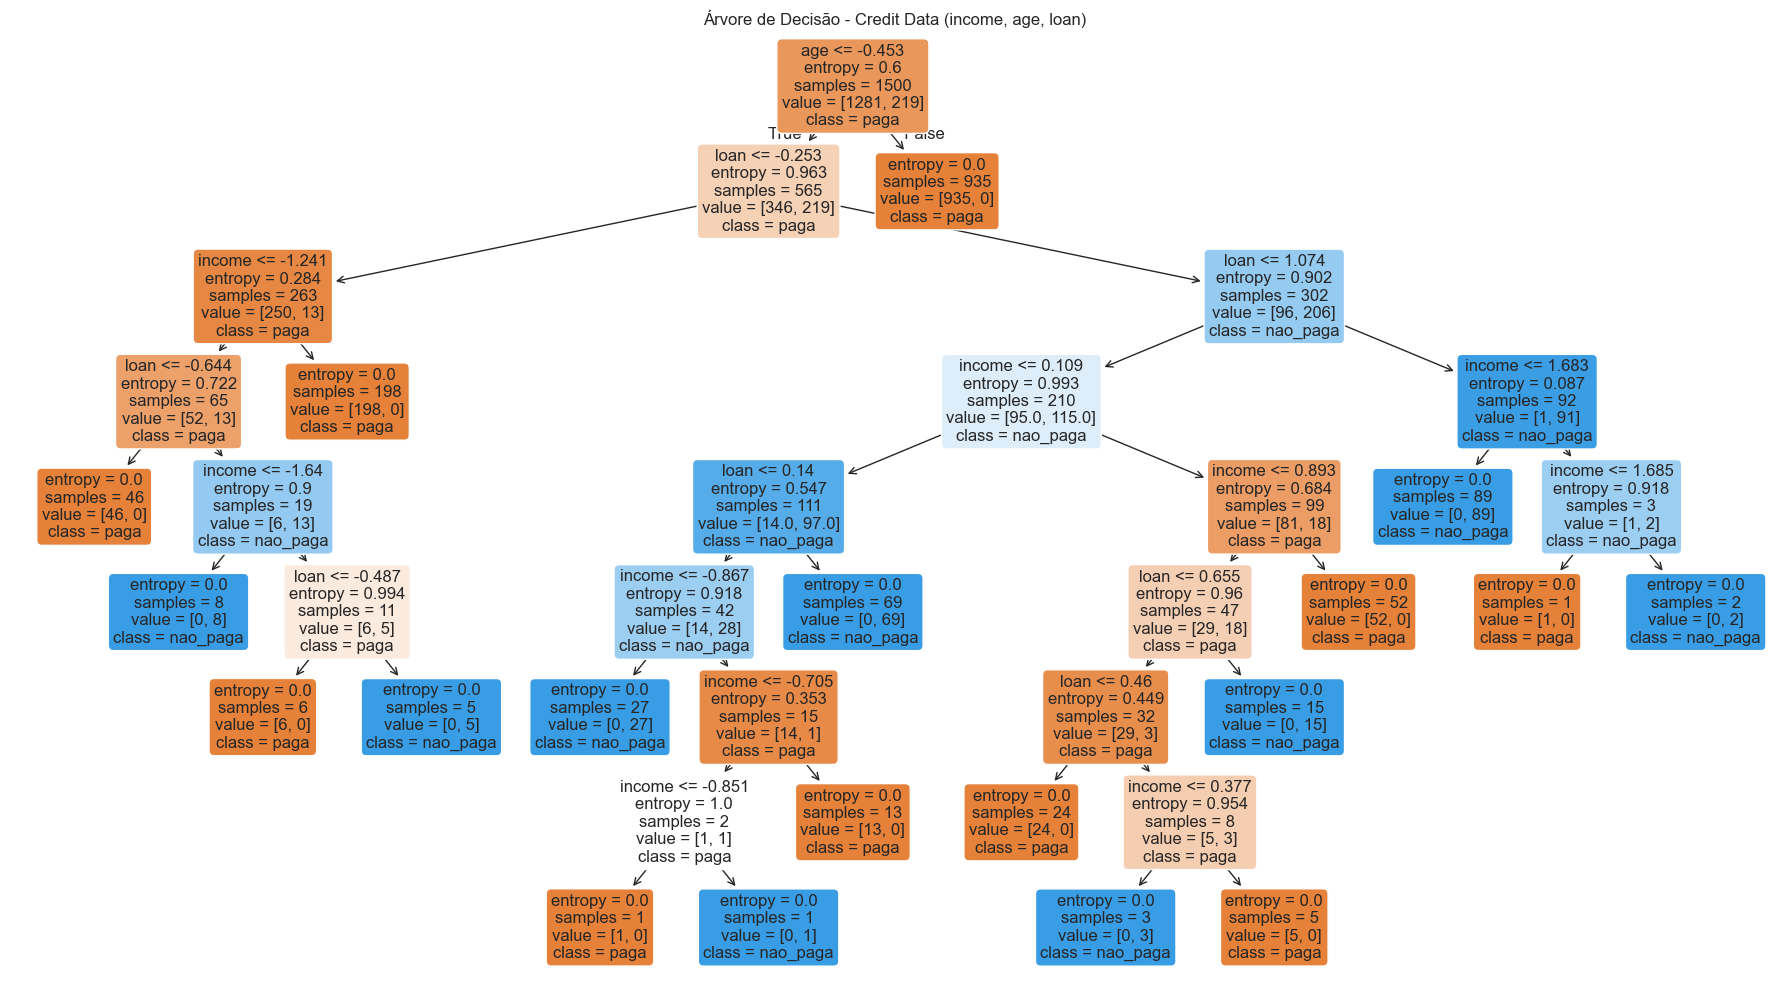

In [57]:
from sklearn import tree
fig, ax = plt.subplots(figsize=(18, 10))

tree.plot_tree(
    arvore_credit,
    feature_names=['income', 'age', 'loan'],
    class_names=['paga', 'nao_paga'],
    filled=True,
    rounded=True,
    fontsize=12,
    ax=ax
)
plt.title('Árvore de Decisão - Credit Data (income, age, loan)')
fig.tight_layout()
fig.savefig('arvore_credit.png', dpi=150, bbox_inches='tight')
plt.show()

# Algoritmo Random Forest

Nesta seção iremos utilizar o algoritmo Random Forest para a mesma base de crédito (**Credit Risk Dataset**) - arquivo *credit1.pkl*.

a) Importe o pacote RandomForestClassifier do sklearn para treinar o seu algoritmo de floresta randomica.

In [58]:
from sklearn.ensemble import RandomForestClassifier

b) Para gerar a classificação você deve adicionar alguns parâmetros:
*   n_estimators=10  --> número de árvores que você irá criar
*   criterion='entropy'
*   random_state = 0

In [59]:
rf_credit = RandomForestClassifier(
    n_estimators=10,
    criterion='entropy',
    random_state=0
)
rf_credit.fit(X_credit_treinamento, y_credit_treinamento)
print('Random Forest treinado com sucesso!')

previsoes_rf = rf_credit.predict(X_credit_teste)
print('Exemplo de previsões RF (primeiros 10):', previsoes_rf[:10])

Random Forest treinado com sucesso!
Exemplo de previsões RF (primeiros 10): [1 0 0 0 0 0 0 0 0 0]


c) Faça a previsão com os dados de teste. Visualize os dados e verifique se as previsões estão de acordo com os dados de teste (respostas reais).

In [60]:
print('Tamanho previsões RF:', len(previsoes_rf), ' | Tamanho y_teste:', len(y_credit_teste))

Tamanho previsões RF: 500  | Tamanho y_teste: 500


d) Agora faça o cálculo da acurácia para calcular a taxa de acerto entre os valores reais (y teste) e as previsões. O resultado foi melhor do que a árvore de decisão simples?

In [61]:
from sklearn.metrics import accuracy_score
acuracia_rf = accuracy_score(y_credit_teste, previsoes_rf)
print(f'Acurácia (Random Forest): {acuracia_rf:.4f}')

Acurácia (Random Forest): 0.9680


e) Se o resultado foi inferior, como você poderia resolver isso? Quais foram os resultados obtidos?

Os resultados iniciais foram de 0.96 acurácia. Seria possível resolver isso aumentando o número de árvores (n_estimators) ou ajustando outros parametros do modelo.

f) Faça a análise da Matriz de Confusão.

In [62]:
from sklearn.metrics import confusion_matrix
cm_rf = confusion_matrix(y_credit_teste, previsoes_rf, labels=[0, 1])
print('Matriz de Confusão RF (reais x previstas):')
print(cm_rf)

# [[TN, FP],
#  [FN, TP]]
if cm_rf.shape == (2, 2):
    tn, fp, fn, tp = cm_rf.ravel()
    print('\nRF - Respostas:')
    print(f'i.  Correto pagam (classe 0) [TN]: {tn}')
    print(f'ii. Incorretamente como não pagantes (real 0, predito 1) [FP]: {fp}')
    print(f'iii. Correto não pagam (classe 1) [TP]: {tp}')
    print(f'iv. Incorretamente como pagantes (real 1, predito 0) [FN]: {fn}')
else:
    print('\nAviso: Matriz de confusão RF não é 2x2.')

Matriz de Confusão RF (reais x previstas):
[[432   4]
 [ 12  52]]

RF - Respostas:
i.  Correto pagam (classe 0) [TN]: 432
ii. Incorretamente como não pagantes (real 0, predito 1) [FP]: 4
iii. Correto não pagam (classe 1) [TP]: 52
iv. Incorretamente como pagantes (real 1, predito 0) [FN]: 12


g) Faça um print do parâmetro classification_report entre os dados de teste e as previsões. Explique qual é a relação entre precision e recall nos dados. Como você interpreta esses dados?

In [63]:
from sklearn.metrics import classification_report
print('Classification Report (Random Forest):')
print(classification_report(y_credit_teste, previsoes_rf, target_names=['paga', 'nao_paga']))

print('Resumo: Precisão = acertos entre os previstos como nao_paga; Recall = proporção de nao_paga reais encontrados.')
print('Interpretação: Em crédito, prioriza-se alto recall da classe nao_paga (reduzir falsos negativos), aceitando algum custo em precisão.')


Classification Report (Random Forest):
              precision    recall  f1-score   support

        paga       0.97      0.99      0.98       436
    nao_paga       0.93      0.81      0.87        64

    accuracy                           0.97       500
   macro avg       0.95      0.90      0.92       500
weighted avg       0.97      0.97      0.97       500

Resumo: Precisão = acertos entre os previstos como nao_paga; Recall = proporção de nao_paga reais encontrados.
Interpretação: Em crédito, prioriza-se alto recall da classe nao_paga (reduzir falsos negativos), aceitando algum custo em precisão.
